In [21]:
!pip install pandas seaborn

# Techcombank 2025 Financial Analysis and Visualization

This notebook contains the data analysis and visualizations for the Techcombank 2025 Insights report for the Board of Directors.



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df1 = pd.read_csv('aithucchien_1.csv')
df2 = pd.read_csv('aithucchien_2.csv')
df3 = pd.read_csv('aithucchien_3.csv')

# Set plot style
sns.set_style("whitegrid")



## Trang 4: Lợi nhuận trước thuế (Profit Before Tax)

### Phân tích

Phân tích ban đầu trong kế hoạch cho thấy sự tăng trưởng đột phá về lợi nhuận. Tuy nhiên, dữ liệu cho thấy điều này không chính xác. Kế hoạch đã so sánh lợi nhuận của một quý (Q2/2025) với một quý trước đó (Q4/2024) và trình bày nó như là tăng trưởng cả năm.

Một phép so sánh chính xác hơn là so sánh kết quả 6 tháng đầu năm. Dữ liệu 6 tháng cho thấy một sự sụt giảm nhẹ trong lợi nhuận trước thuế.

- **Lợi nhuận trước thuế 6T2024:** 15,628 tỷ VND
- **Lợi nhuận trước thuế 6T2025:** 15,135 tỷ VND
- **Thay đổi:** -3.2%

Biểu đồ dưới đây sẽ minh họa sự so sánh này một cách chính xác.


C:\Users\Tran Thai Hoa\AppData\Local\Temp\ipykernel_16100\547701229.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Năm', y='Lợi nhuận trước thuế (tỷ VND)', data=pbt_data, palette=['#00529B', '#E67E22'])


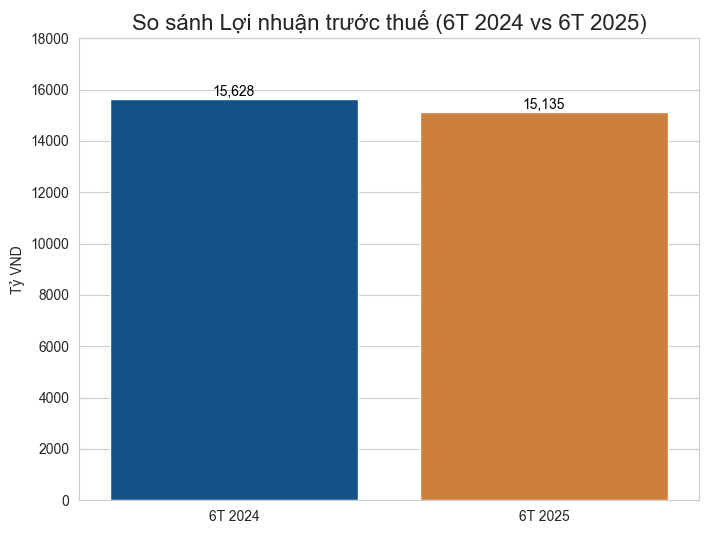

In [23]:
# Data for Profit Before Tax (6M 2024 vs 6M 2025)
pbt_6m_2024 = 15628
pbt_6m_2025 = 15135

# Create a DataFrame for plotting
pbt_data = pd.DataFrame({
    'Năm': ['6T 2024', '6T 2025'],
    'Lợi nhuận trước thuế (tỷ VND)': [pbt_6m_2024, pbt_6m_2025]
})

# Plotting the bar chart
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Năm', y='Lợi nhuận trước thuế (tỷ VND)', data=pbt_data, palette=['#00529B', '#E67E22'])

# Adding data labels
for index, row in pbt_data.iterrows():
    barplot.text(row.name, row['Lợi nhuận trước thuế (tỷ VND)'], f'{row["Lợi nhuận trước thuế (tỷ VND)"]:,}', color='black', ha="center", va="bottom")

plt.title('So sánh Lợi nhuận trước thuế (6T 2024 vs 6T 2025)', fontsize=16)
plt.xlabel('')
plt.ylabel('Tỷ VND')
plt.ylim(0, 18000)

# Save the figure
plt.savefig('pbt_chart.png', dpi=300, bbox_inches='tight')

plt.show()


## Trang 5: NIM (Biên lãi ròng) và Chi phí vốn (Cost of Funds)

### Phân tích

Dữ liệu cho thấy một xu hướng quan trọng: Biên lãi ròng (NIM) đã giảm nhẹ trong năm qua, điều này phản ánh môi trường lãi suất cạnh tranh. Tuy nhiên, ngân hàng đã quản lý rất tốt Chi phí vốn, giữ nó ở mức ổn định.

- **Năm 2024:**
    - NIM: 4.2%
    - Chi phí vốn: 3.3%
- **Năm 2025 (LTM Q2):**
    - NIM: 3.7%
    - Chi phí vốn: 3.5%

Việc chi phí vốn được kiểm soát tốt đã giúp giảm bớt tác động tiêu cực từ việc NIM bị thu hẹp. Biểu đồ kết hợp dưới đây sẽ làm rõ mối quan hệ này.


### Phân tích Hiệu quả Quản lý: ROA và ROE

Hiệu quả quản lý của ngân hàng được thể hiện qua các chỉ số ROA và ROE. Cả hai chỉ số này đều cho thấy sự sụt giảm nhẹ, phản ánh áp lực lên lợi nhuận trong năm qua.

- **Năm 2024:**
    - ROA: 2.4%
    - ROE: 15.5%
- **Năm 2025 (LTM Q2):**
    - ROA: 2.2%
    - ROE: 14.5%

Sự sụt giảm này củng cố thêm nhận định rằng năm 2025 là một năm đầy thách thức, và việc duy trì lợi nhuận đòi hỏi phải có các biện pháp quản trị hiệu quả.


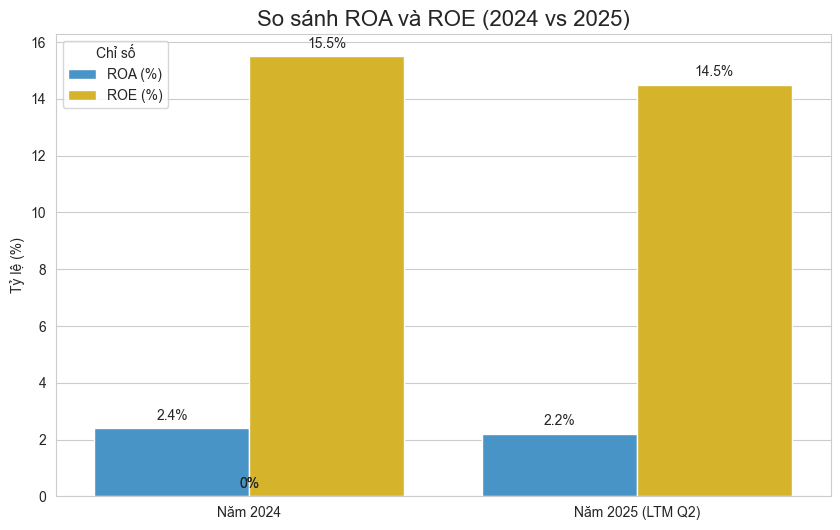

In [24]:
# Data for ROA and ROE
years = ['Năm 2024', 'Năm 2025 (LTM Q2)']
roa = [2.4, 2.2]
roe = [15.5, 14.5]

df_roa_roe = pd.DataFrame({
    'Năm': years,
    'ROA (%)': roa,
    'ROE (%)': roe
})

# Melt the DataFrame to have a long format for seaborn
df_melted = df_roa_roe.melt(id_vars='Năm', var_name='Chỉ số', value_name='Giá trị (%)')

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
grouped_barplot = sns.barplot(x='Năm', y='Giá trị (%)', hue='Chỉ số', data=df_melted, palette=['#3498DB', '#F1C40F'])

# Adding data labels
for p in grouped_barplot.patches:
    grouped_barplot.annotate(f'{p.get_height()}%', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')

plt.title('So sánh ROA và ROE (2024 vs 2025)', fontsize=16)
plt.xlabel('')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Chỉ số')

# Save the figure
plt.savefig('roa_roe_chart.png', dpi=300, bbox_inches='tight')

plt.show()


## Trang 6: Phân tích Xu hướng - Tăng trưởng tín dụng

### Phân tích

Một trong những xu hướng chính được xác định trong bối cảnh kinh tế vĩ mô đầy thách thức là sự tăng trưởng chậm lại của tín dụng. Dữ liệu cho thấy tốc độ tăng trưởng tín dụng trong 6 tháng đầu năm 2025 đã chậm lại so với cùng kỳ năm 2024.

- **Tăng trưởng tín dụng 6T2024:** 11.6%
- **Tăng trưởng tín dụng 6T2025:** 10.6%

Sự chậm lại này phản ánh sự thận trọng chung của thị trường và là một yếu tố quan trọng cần xem xét khi xây dựng chiến lược cho năm tới. Nó nhấn mạnh sự cần thiết phải đa dạng hóa nguồn thu và không chỉ dựa vào tăng trưởng tín dụng truyền thống.


C:\Users\Tran Thai Hoa\AppData\Local\Temp\ipykernel_16100\1394281276.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  credit_barplot = sns.barplot(x='Năm', y='Tăng trưởng tín dụng (%)', data=credit_growth_data, palette=['#2ECC71', '#F39C12'])


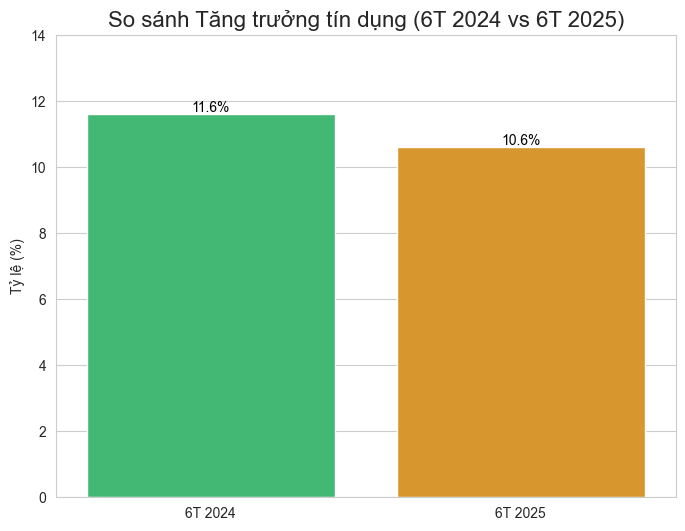

In [25]:
# Data for Credit Growth
credit_growth_6m_2024 = 11.6
credit_growth_6m_2025 = 10.6

# Create a DataFrame for plotting
credit_growth_data = pd.DataFrame({
    'Năm': ['6T 2024', '6T 2025'],
    'Tăng trưởng tín dụng (%)': [credit_growth_6m_2024, credit_growth_6m_2025]
})

# Plotting the bar chart
plt.figure(figsize=(8, 6))
credit_barplot = sns.barplot(x='Năm', y='Tăng trưởng tín dụng (%)', data=credit_growth_data, palette=['#2ECC71', '#F39C12'])

# Adding data labels
for index, row in credit_growth_data.iterrows():
    credit_barplot.text(row.name, row['Tăng trưởng tín dụng (%)'], f'{row["Tăng trưởng tín dụng (%)"]}%', color='black', ha="center", va="bottom")

plt.title('So sánh Tăng trưởng tín dụng (6T 2024 vs 6T 2025)', fontsize=16)
plt.xlabel('')
plt.ylabel('Tỷ lệ (%)')
plt.ylim(0, 14)

# Save the figure
plt.savefig('credit_growth_chart.png', dpi=300, bbox_inches='tight')

plt.show()


## Tổng kết và Đề xuất Chiến lược cho năm 2026

### Kết luận từ Dữ liệu

Phân tích toàn diện từ các biểu đồ trên cho thấy một bức tranh rõ ràng: Năm 2025 không phải là một năm tăng trưởng bùng nổ, mà là một năm của **sự vững vàng trong thách thức**. Các điểm chính bao gồm:

1.  **Lợi nhuận chịu áp lực:** Lợi nhuận trước thuế 6 tháng đầu năm giảm nhẹ 3.2%, cho thấy môi trường kinh doanh không thuận lợi.
2.  **Biên lợi nhuận bị thu hẹp:** NIM giảm từ 4.2% xuống 3.7% là nguyên nhân chính gây áp lực lên lợi nhuận, dù chi phí vốn được quản lý tốt.
3.  **Thị trường tăng trưởng chậm lại:** Tăng trưởng tín dụng chậm lại (từ 11.6% xuống 10.6%) cho thấy việc chỉ dựa vào cho vay truyền thống sẽ không đủ để thúc đẩy tăng trưởng trong tương lai.

### Rủi ro và Cơ hội

- **Rủi ro chính:** Sựa phụ thuộc vào thu nhập từ lãi trong bối cảnh NIM tiếp tục bị nén và thị trường tín dụng tăng trưởng chậm.
- **Cơ hội Vàng:** Lợi thế về CASA (41.1%) và nền tảng khách hàng số hóa lớn là nền tảng vững chắc để xây dựng các nguồn **thu nhập ngoài lãi** mạnh mẽ và bền vững.

### 3 Đề xuất Chiến lược Trọng tâm

Dựa trên các phân tích trên, Techcombank nên tập trung vào 3 lĩnh vực chiến lược để thúc đẩy tăng trưởng trong năm 2026:

1.  **Quản lý Dòng tiền Thông minh cho SME:** Phát triển các giải pháp ngân hàng giao dịch số để thu hút nguồn tiền gửi không kỳ hạn (CASA) và tạo ra nguồn thu phí dồi dào, giảm sự phụ thuộc vào tín dụng.
2.  **Trung tâm Đầu tư & Bảo hiểm Cá nhân hóa:** Tận dụng dữ liệu khách hàng để cung cấp các sản phẩm đầu tư và bảo hiểm phù hợp, đa dạng hóa nguồn thu ngoài lãi.
3.  **Hệ sinh thái Số và Tài chính Nhúng:** Tăng cường hợp tác với các đối tác bán lẻ, tiêu dùng để cung cấp các dịch vụ tài chính (VD: Mua trước trả sau) ngay trên các nền tảng của đối tác, tạo ra một nguồn thu mới và tăng cường sự gắn kết của khách hàng.


C:\Users\Tran Thai Hoa\AppData\Local\Temp\ipykernel_16100\1266199163.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='NIM (%)', data=df_nim_cof, ax=ax1, palette=['#00529B', '#5DADE2'], label='NIM')


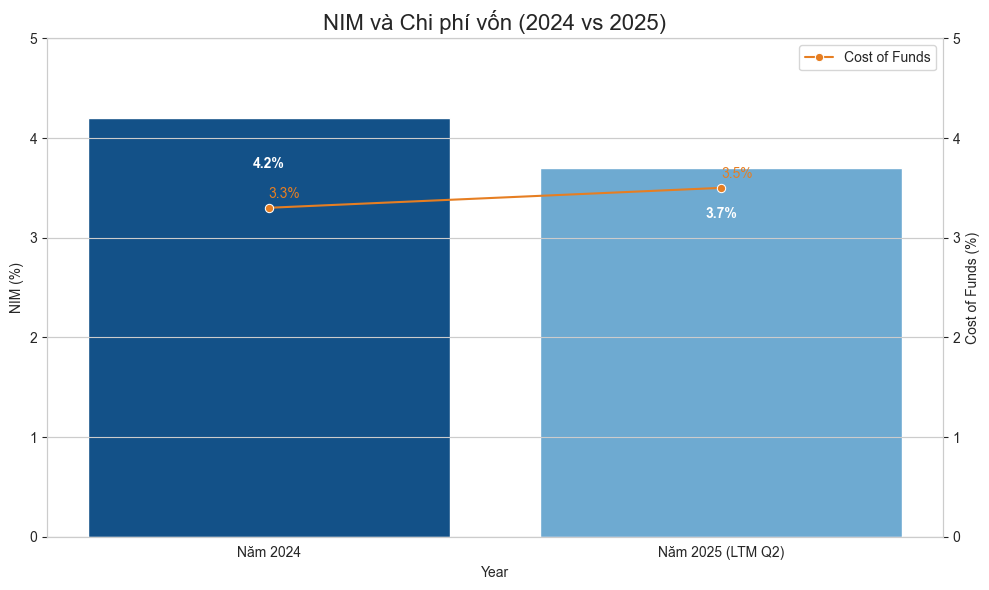

In [26]:
# Data for NIM and Cost of Funds
years = ['Năm 2024', 'Năm 2025 (LTM Q2)']
nim = [4.2, 3.7]
cost_of_funds = [3.3, 3.5]

df_nim_cof = pd.DataFrame({
    'Year': years,
    'NIM (%)': nim,
    'Cost of Funds (%)': cost_of_funds
})

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting NIM as a bar chart
sns.barplot(x='Year', y='NIM (%)', data=df_nim_cof, ax=ax1, palette=['#00529B', '#5DADE2'], label='NIM')
ax1.set_ylabel('NIM (%)')
ax1.set_ylim(0, 5)

# Adding data labels for NIM
for i, v in enumerate(nim):
    ax1.text(i, v - 0.5, str(v) + '%', color='white', ha='center', fontweight='bold')


# Create a second y-axis for the Cost of Funds
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Cost of Funds (%)', data=df_nim_cof, ax=ax2, color='#E67E22', marker='o', label='Cost of Funds')
ax2.set_ylabel('Cost of Funds (%)')
ax2.set_ylim(0, 5)

# Adding data labels for Cost of Funds
for i, v in enumerate(cost_of_funds):
    ax2.text(i, v + 0.1, str(v) + '%', color='#E67E22')


# Finalizing the plot
plt.title('NIM và Chi phí vốn (2024 vs 2025)', fontsize=16)
fig.tight_layout()
plt.legend()

# Save the figure
plt.savefig('nim_cof_chart.png', dpi=300, bbox_inches='tight')

plt.show()
